In [1]:
import networkx as nx
import operator

In [2]:
#transofrms a directed cyclic graph to directed acyclic graph by compressing the components of the graph into one node
def transformToDAG(G):
    g2 = nx.DiGraph()
    components = list(nx.strongly_connected_components(G))
    for component in components:
        new_node = ','.join(str(e) for e in component)
        if not(new_node in g2.nodes):
            g2.add_node(new_node, size=len(component))
    
        suc_nodes = set()
        for e in component:
            for nei in G.neighbors(e):
                if not (nei in component):
                    suc_nodes.add(nei)
        for node in suc_nodes:
            for c in components:
                if node in c:
                    to_n = ','.join(str(e) for e in c)
                    break
            if not(to_n in g2.nodes):
                g2.add_node(to_n, size=len(component))
            if not((new_node, to_n) in g2.edges):
                g2.add_edge(new_node, to_n, weight=g2.node[to_n]['size'])
    return g2
    

In [3]:
#finds all the bridges based on importance --> based on their weight and returns a soreted list of couples of edge and weigth
def getBridges(G):
    bridges = {}
    for brg in nx.bridges(G.to_undirected()):
        if (brg[1], brg[0]) in G.edges:
            bridges[(brg[1], brg[0])] = G.get_edge_data(brg[1], brg[0], 'weight')['weight']
        else:
            bridges[brg] = G.get_edge_data(brg[0], brg[1], 'weight')['weight']
    sorted_brgs = sorted(bridges.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_brgs

In [4]:
def getLongestPath(G):
    return nx.dag_longest_path(G)

In [29]:
#find shortest (longest) paths between the root and all leaves --> as parallel paths
def calculatePathWeight(G, path):
    w = 0
    i = 0
    while i < (len(path) - 1):
        w = w + G[path[i]][path[i+1]]['weight']
        i = i + 1
    return w

def getParallelPaths(G):
    leaves = []
    roots = []
    for n in G.nodes:
        if G.out_degree(n) == 0:
            leaves.append(n)
        if G.in_degree(n) == 0:
             roots.append(n)
    print(leaves)
    print(roots)
    paths = []
    for l in leaves:
        for r in roots:
            if not l in nx.descendants(G, r):
                continue
            p = nx.shortest_path(G, r, l, weight='weight')
            paths.append((p, calculatePathWeight(G, p)))
    paths.sort(key=operator.itemgetter(1), reverse=True)
    return paths

In [232]:
#list(nx.all_simple_paths(G, i, j)) for i in G.nodes for j in G.nodes if i != j and nx.has_path(G, i, j)]
#mytree = nx.maxi_spanning_tree(myg.to_undirected())
#B = nx.dag_to_branching(G)

In [83]:
#creates edge weight based on node weight
def loadEdgeWeights(G):
    for e in G.edges:
        G[e[0]][e[1]]['weight'] = G.node[e[1]]['w']

In [72]:
g =nx.DiGraph()
g.add_node(1, w=1)
g.add_node(2, w=1)
g.add_node(3, w=10)
g.add_node(4, w=1)
g.add_node(5, w=1)
g.add_node(6, w=2)
g.add_node(7, w=3)
g.add_node(8, w=2)

In [73]:
g.add_edge(1,2)
g.add_edge(2,3)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_edge(2,6)
g.add_edge(6,3)
g.add_edge(6,7)
g.add_edge(7,8)
g.add_edge(8,4)
g.add_edge(8,6)
g.add_edge(4,2)

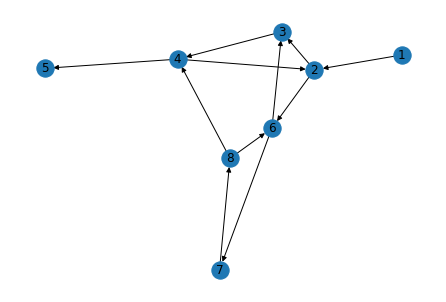

In [149]:
#getLongestPath(g)
#dag_g = transformToDAG(g)
nx.draw(g, with_labels=True)


In [214]:
def DFS(G, n, end, visited, paths):
    if n == end:
        paths.append(visited.copy())
        return paths
    visited.append(n)
    for nei in G.neighbors(n):
        if not nei in visited:
            DFS(G, nei, end, visited, paths)
    if visited:
        visited.pop()
    return paths
    
            
def getPaths(G, start, end):
    res = []
    for n in G.neighbors(start):
        res = res + DFS(G, n, end, [start], [])
    paths = []
    for path in res:
        paths.append(path + [end])
    return paths

In [215]:
def isSequenceInList(seq, liste):
    try:
        index = liste.index(seq[0])
    except:
        return False

    for i in range(len(seq)):
        try:
            if not seq[i] == liste[index + i]:
                return False
        except:
            return False
    return True

In [230]:
def getVitalNodesBetween(paths, bridges, start, end):
    res = {}
    for br in bridges:
        res[br[0]] = 0
        for path in paths:
            if isSequenceInList(br[0], path):
                res[br[0]] += 1
    res = sorted(res.items(), key=operator.itemgetter(1), reverse=True)
    final_res = []
    for item in res:
        if item[1] > 1:
            if not item[0][0] == start:
                final_res.append(item[0][0])
            if not item[0][1] == end:
                final_res.append(item[0][1])
    return final_res

In [231]:
paths = getPaths(g, 1, 5)
bridges = getBridges(g)
getVitalNodesBetween(paths, bridges, 1, 5)

[2, 4]